# Deep Learning: Assignment 1

ID #1 : 0008003254 <br>
ID #2 : 311149082

In this homework assignment, you are requested to implement a full backprop algorithm using only *numpy*.

- We assume sigmoid activation across all layers.
- We assume a single value in the output layer

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0,5.0) # set default size of plots

The following class represents a simple feed forward network with multiple layers. The network class provides methods for running forward and backward for a single instance, throught the network. You should implement the methods (indicated with TODO), that performs forward and backward for an entire batch. Note, the idea is to use matrix multiplications, and not running standard loops over the instances in the batch.

In [ ]:
class MyNN:
  def __init__(self, learning_rate, layer_sizes):
    '''
    learning_rate - the learning to use in backward
    layer_sizes - a list of numbers, each number repreents the nuber of neurons
                  to have in every layer. Therfore, the length of the list 
                  represents the number layers this network has.
    '''
    self.learning_rate = learning_rate
    self.layer_sizes = layer_sizes
    self.model_params = {}
    self.memory = {}
    self.grads = {}
    
    # Initializing weights
    for layer_index in range(len(layer_sizes) - 1):
      W_input = layer_sizes[layer_index + 1]
      W_output = layer_sizes[layer_index]
      self.model_params['W_' + str(layer_index + 1)] = np.random.randn(W_input, W_output) * 0.1
      self.model_params['b_' + str(layer_index + 1)] = np.random.randn(W_input) * 0.1

  def log_loss(self, y_hat, y):
    '''
    Logistic loss, assuming a single value in y_hat and y.
    '''
    m = y_hat[0]
    cost = -y[0]*np.log(y_hat[0]) - (1 - y[0])*np.log(1 - y_hat[0])
    return cost         
  
  def forward_single_instance(self, x):    
    a_i_1 = x
    self.memory['a_0'] = x
    for layer_index in range(len(self.layer_sizes) - 1):
      W_i = self.model_params['W_' + str(layer_index + 1)]
      b_i = self.model_params['b_' + str(layer_index + 1)]
      z_i = np.dot(W_i, a_i_1) + b_i
      a_i = 1/(1+np.exp(-z_i))
      self.memory['a_' + str(layer_index + 1)] = a_i
      a_i_1 = a_i
    return a_i_1
    
  def backward_single_instance(self, y):
    a_output = self.memory['a_' + str(len(self.layer_sizes) - 1)]
    dz = a_output - y
     
    for layer_index in range(len(self.layer_sizes) - 1, 0, -1):
      # print(layer_index)
      a_l_1 = self.memory['a_' + str(layer_index - 1)]
      dW = np.dot(dz.reshape(-1, 1), a_l_1.reshape(1, -1))
      self.grads['dW_' + str(layer_index)] = dW
      W_l = self.model_params['W_' + str(layer_index)]
      self.grads['db_' + str(layer_index)] = dz
      dz = (a_l_1 * (1 - a_l_1)).reshape(-1, 1) * np.dot(W_l.T, dz.reshape(-1, 1))
  
  def update(self):
     for layer_index in range(len(self.layer_sizes) - 1):
       W_i = self.model_params['W_' + str(layer_index+1)] - (self.learning_rate * self.grads['dW_' + str(layer_index+1) ])
       self.model_params['W_' + str(layer_index+1)] = W_i
       b_i = self.model_params['b_' + str(layer_index + 1)] - (self.learning_rate * self.grads['db_' + str(layer_index+1)])
       self.model_params['b_' + str(layer_index + 1)] = b_i
      
  # Forward propogation for batch
  def forward_batch(self, X):
    A_i_1 = X
    self.memory['A_0'] = X
    for layer_index in range(len(self.layer_sizes) - 1):
      W_i = self.model_params['W_' + str(layer_index + 1)]
      b_i = self.model_params['b_' + str(layer_index + 1)] 
      # Create a matrix out of the b_i values for ease of addition with W_iA_i
      Temp = np.matmul(W_i, A_i_1)
      b_i_matrix = [ np.full(shape = len(Temp[0]), fill_value = b_i[j]) for j in range(len(Temp))]
      b_i_matrix = np.array(b_i_matrix)
     
      Z_i = np.matmul(W_i, A_i_1) + b_i_matrix #Add the bias to each column
      A_i = 1/(1+np.exp(-Z_i))
      self.memory['A_' + str(layer_index + 1)] = A_i
      A_i_1 = A_i
    return A_i_1

  # Backward propogation for batch
  def backward_batch(self, y):
    A_output = self.memory['A_' + str(len(self.layer_sizes) - 1)]
    dZ = A_output - y
     
    for layer_index in range(len(self.layer_sizes) - 1, 0, -1):
      A_l_1 = self.memory['A_' + str(layer_index - 1)]
      dW = np.dot(dZ, A_l_1.T)
      self.grads['dW_' + str(layer_index)] = dW  
      W_l = self.model_params['W_' + str(layer_index)]
      self.grads['db_' +  str(layer_index)] = np.sum(dZ) / len(dZ)
      dZ = (A_l_1 * (1 - A_l_1)) * np.dot(W_l.T, dZ)
  
  # Log_loss for batch instances
  def log_loss_batch(self, y_hat, y):
    cost = np.sum(-y*np.log(y_hat) - (np.ones(len(y)) - y)*np.log(np.ones(len(y)) - y_hat))/len(y[0])
    return cost

In [ ]:
# Initiate a nn. Parameters are learning rate and layer sizes
nn = MyNN(0.01, [3, 2, 1])

In [ ]:
nn.model_params

{'W_1': array([[ 0.0234318 ,  0.18163821, -0.0334032 ],
        [-0.02622669, -0.07845425, -0.08637216]]),
 'W_2': array([[-0.0869484 ,  0.00595802]]),
 'b_1': array([ 0.01880909, -0.07318834]),
 'b_2': array([0.0664715])}

In [ ]:
# Set random x, y
x = np.random.randn(3)
y = np.random.randn(1)
# Measure result after single isntance forward propogation
y_hat = nn.forward_single_instance(x)
print(y_hat)

[0.50749467]


In [ ]:
nn.backward_single_instance(y)

In [ ]:
nn.memory

{'a_0': array([ 0.50794347, -1.04736506,  0.93028313]),
 'a_1': array([0.45249253, 0.47884006]),
 'a_2': array([0.50749467])}

In [ ]:
def train(X, y, epochs, batch_size, print_epoch):
  '''
  Train procedure, please note the TODOs inside
  '''
  loss = []
  for e in range(1, epochs + 1):
    epoch_loss = 0
    # Shuffling the data
    idx = np.random.permutation(X.shape[1])
    X = X.T[idx].T
    y = y.T[idx].T
    # Dividing into batches
    batches = []
    for i in range(int(len(X[0])/batch_size)):
        X_temp = X[:,range(i*batch_size, (i+1)*batch_size)]
        y_temp = y[:,range(i*batch_size, (i+1)*batch_size)]
        batch = (X_temp, y_temp)
        batches.append(batch)
    # For each batch, forward, backward propogate aswell as update 
    for X_b, y_b in batches:
      y_hat = nn.forward_batch(X_b)
      epoch_loss += nn.log_loss_batch(y_hat, y_b)
      nn.backward_batch(y_b)
      nn.update()
    # Update the total loss for that epoch
    loss_i = epoch_loss/len(batches)
    if print_epoch:
      print(f'Epoch {e}, loss={loss_i}')
    loss.append(loss_i)
  return loss

In [ ]:
# TODO: Make sure the following network trains properly
X = np.random.randn(6, 10)
y = np.random.randn(1, 10)

nn = MyNN(0.001, [6, 4, 3, 1])
batch_size = 8
epochs = 2
loss = train(X, y, epochs, batch_size, True)

Epoch 1, loss=0.6731914762363342
Epoch 2, loss=0.668083610885826


#TODO: train on an external dataset

Train on the Bike Sharing dataset, using the same split as in *DL Notebook 4 - logistic regression*.
Use the following features from the data:

* temp
* atemp
* hum
* windspeed
* weekday

The response variable is, like in Notebook 4, raw["success"] = raw["cnt"] > (raw["cnt"].describe()["mean"]).

The architecture of the network should be: [5, 40, 30, 10, 7, 5, 3, 1].

Use batch_size=8, and train it for 100 epochs on the train set (based on the split as requested above).

Then, plot loss per epoch.

In [ ]:
# Load the relevant data
!git clone https://github.com/kfirbar/course-ml-data.git
raw = pd.read_csv('course-ml-data/Bike-Sharing-Dataset 2/day.csv')

Cloning into 'course-ml-data'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 18 (delta 1), reused 9 (delta 0), pack-reused 0
Unpacking objects: 100% (18/18), done.


In [ ]:
# Adding the success column to the dataframe
raw["success"] = raw["cnt"] > (raw["cnt"].describe()["mean"])
raw

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,success
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,False
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,False
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,False
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,False
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114,False
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095,False
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341,False
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796,False


In [ ]:
# Splitting into X, y according to the specification
X = raw[ ['temp','atemp','hum', 'windspeed', 'weekday' ]].values.T
y = np.array([raw["success"].astype(int)])
X.shape,y.shape

((5, 731), (1, 731))

In [ ]:
# Training the neural networks with the specified layer sizes
nn = MyNN(0.0002, [5, 40, 30, 10, 7, 5, 3, 1])
batch_size = 8
epochs = 100
loss = train(X, y, epochs, batch_size, False)
print(loss)

[0.6949603962980766, 0.6943352178913423, 0.6941745866667406, 0.6941964243553814, 0.6942378326846361, 0.693925493428939, 0.6936426431477766, 0.6937054017375706, 0.6936330375861972, 0.6936898573277218, 0.6937482729390272, 0.6935368216969912, 0.6933682124052973, 0.6934342512438878, 0.6933918117403889, 0.6934536361839195, 0.6931956332037205, 0.6932786655296294, 0.6931569038796054, 0.6933295514020418, 0.6930207624651836, 0.6932895503983385, 0.6931634234231369, 0.6930742135283288, 0.6930613358563131, 0.6930578454140283, 0.6931360571297915, 0.6930371372927623, 0.6930338919115163, 0.6930437177919123, 0.6929621457230327, 0.6930404500463985, 0.6931023134368965, 0.6930176084128191, 0.692953789047953, 0.693164165274262, 0.6930151612736063, 0.6930846231172035, 0.6930156491606945, 0.6930028313199423, 0.6930854112821458, 0.6930174512790803, 0.6930766967242538, 0.6930148506446606, 0.6930719727618457, 0.6930723406570687, 0.6930095091577504, 0.6929615459877269, 0.6930123031089759, 0.6930632015335804, 0.

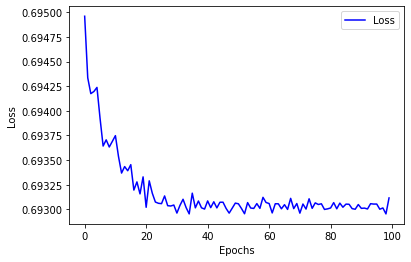

In [ ]:
# Plot the results
fig, ax = plt.subplots()
ax.plot(np.arange(0,len(loss)), loss, c='b', label="Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Seeing as the learning rate is a hyper parameter, we will simulate our nn model with different learning rates to see which one returns the best result 

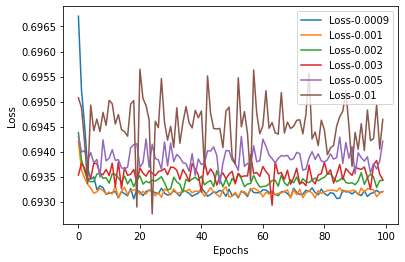

In [ ]:
# Defining different learning rates
learning_rate = [0.0009,0.001,0.002,0.003,0.005,0.01]

fig, ax = plt.subplots()
for lr in learning_rate:
  nn = MyNN(lr, [5, 40, 30, 10, 7, 5, 3, 1])
  batch_size = 8
  epochs = 100
  loss = train(X, y, epochs, batch_size, False)
  ax.plot(np.arange(0,len(loss)), loss, label="Loss-"+str(lr))

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

As we can see the best learning rate is between $0.0009-0.002$. 

### End of assingment 